# Lung primary tumor + Liver metastasis data 

Here you find the code to reproduce the analysis on primary lung tumor and its liver metastasis data. These data have been produced by Navin et al. for their study on intra-tumor heterogeneity characterization [1], and used by Garvin et al. to validate Ginkgo [2]. 

We downloaded CNA calls from Gingko [website](http://qb.cshl.edu/ginkgo/?q=/dZ3tlrOsNJxQrwP1mKc7) and stored their results [here](https://github.com/bioinformatics-polito/PhyliCS_usage/tree/main/data/lung).

## Data Preprocessing 

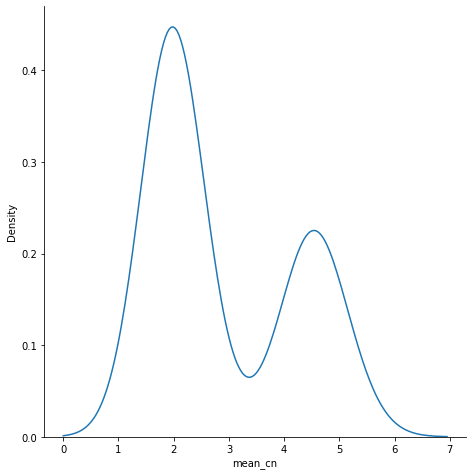

In [5]:
import phylics
import pandas as pd

# primary tumor
navin_prim = phylics.Sample.from_file("data/lung/primary/SegCopy", sample_name="primary")
df = pd.read_csv("data/lung/primary/results.txt", sep="\t", index_col=0).dropna()
ploidy = df['Copy_Number']
navin_prim.mad()
navin_prim.add_annotation(ploidy, "mean_cn")
navin_prim.plot_annotation_dist("mean_cn", kind="kde", figsize=(7,7))

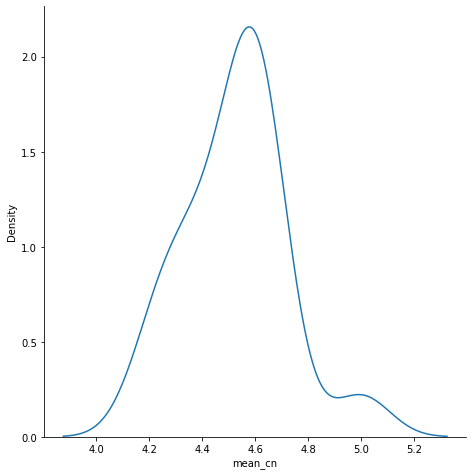

In [6]:
navin_prim = navin_prim.filter("mean_cn", "gt_eq", 3)
navin_prim = navin_prim.filter("mad", "lt_eq", 0.95, percentile=True)

# metastasis
navin_met = phylics.Sample.from_file("data/lung/metastasis/SegCopy", sample_name="metastasis")
df = pd.read_csv("data/lung/metastasis/results.txt", sep="\t", index_col=0).dropna()
ploidy = df['Copy_Number']
navin_met.mad()
navin_met.add_annotation(ploidy, "mean_cn")
navin_prim.plot_annotation_dist("mean_cn", kind="kde", figsize=(7,7))

In [7]:
navin_met = navin_met.filter("mean_cn", "gt_eq", 3)
navin_met = navin_met.filter("mad", "lt_eq", 0.95, percentile=True)

In [9]:
## Spatial Heterogeneity evaluation: SHscore

In [8]:
ss = phylics.MultiSample.from_list(navin_prim, navin_met)
sh_scores = ss.SHscore(n_jobs=10)
sh_scores

,samples_partition,score
0,"[[primary], [metastasis]]",0.536134


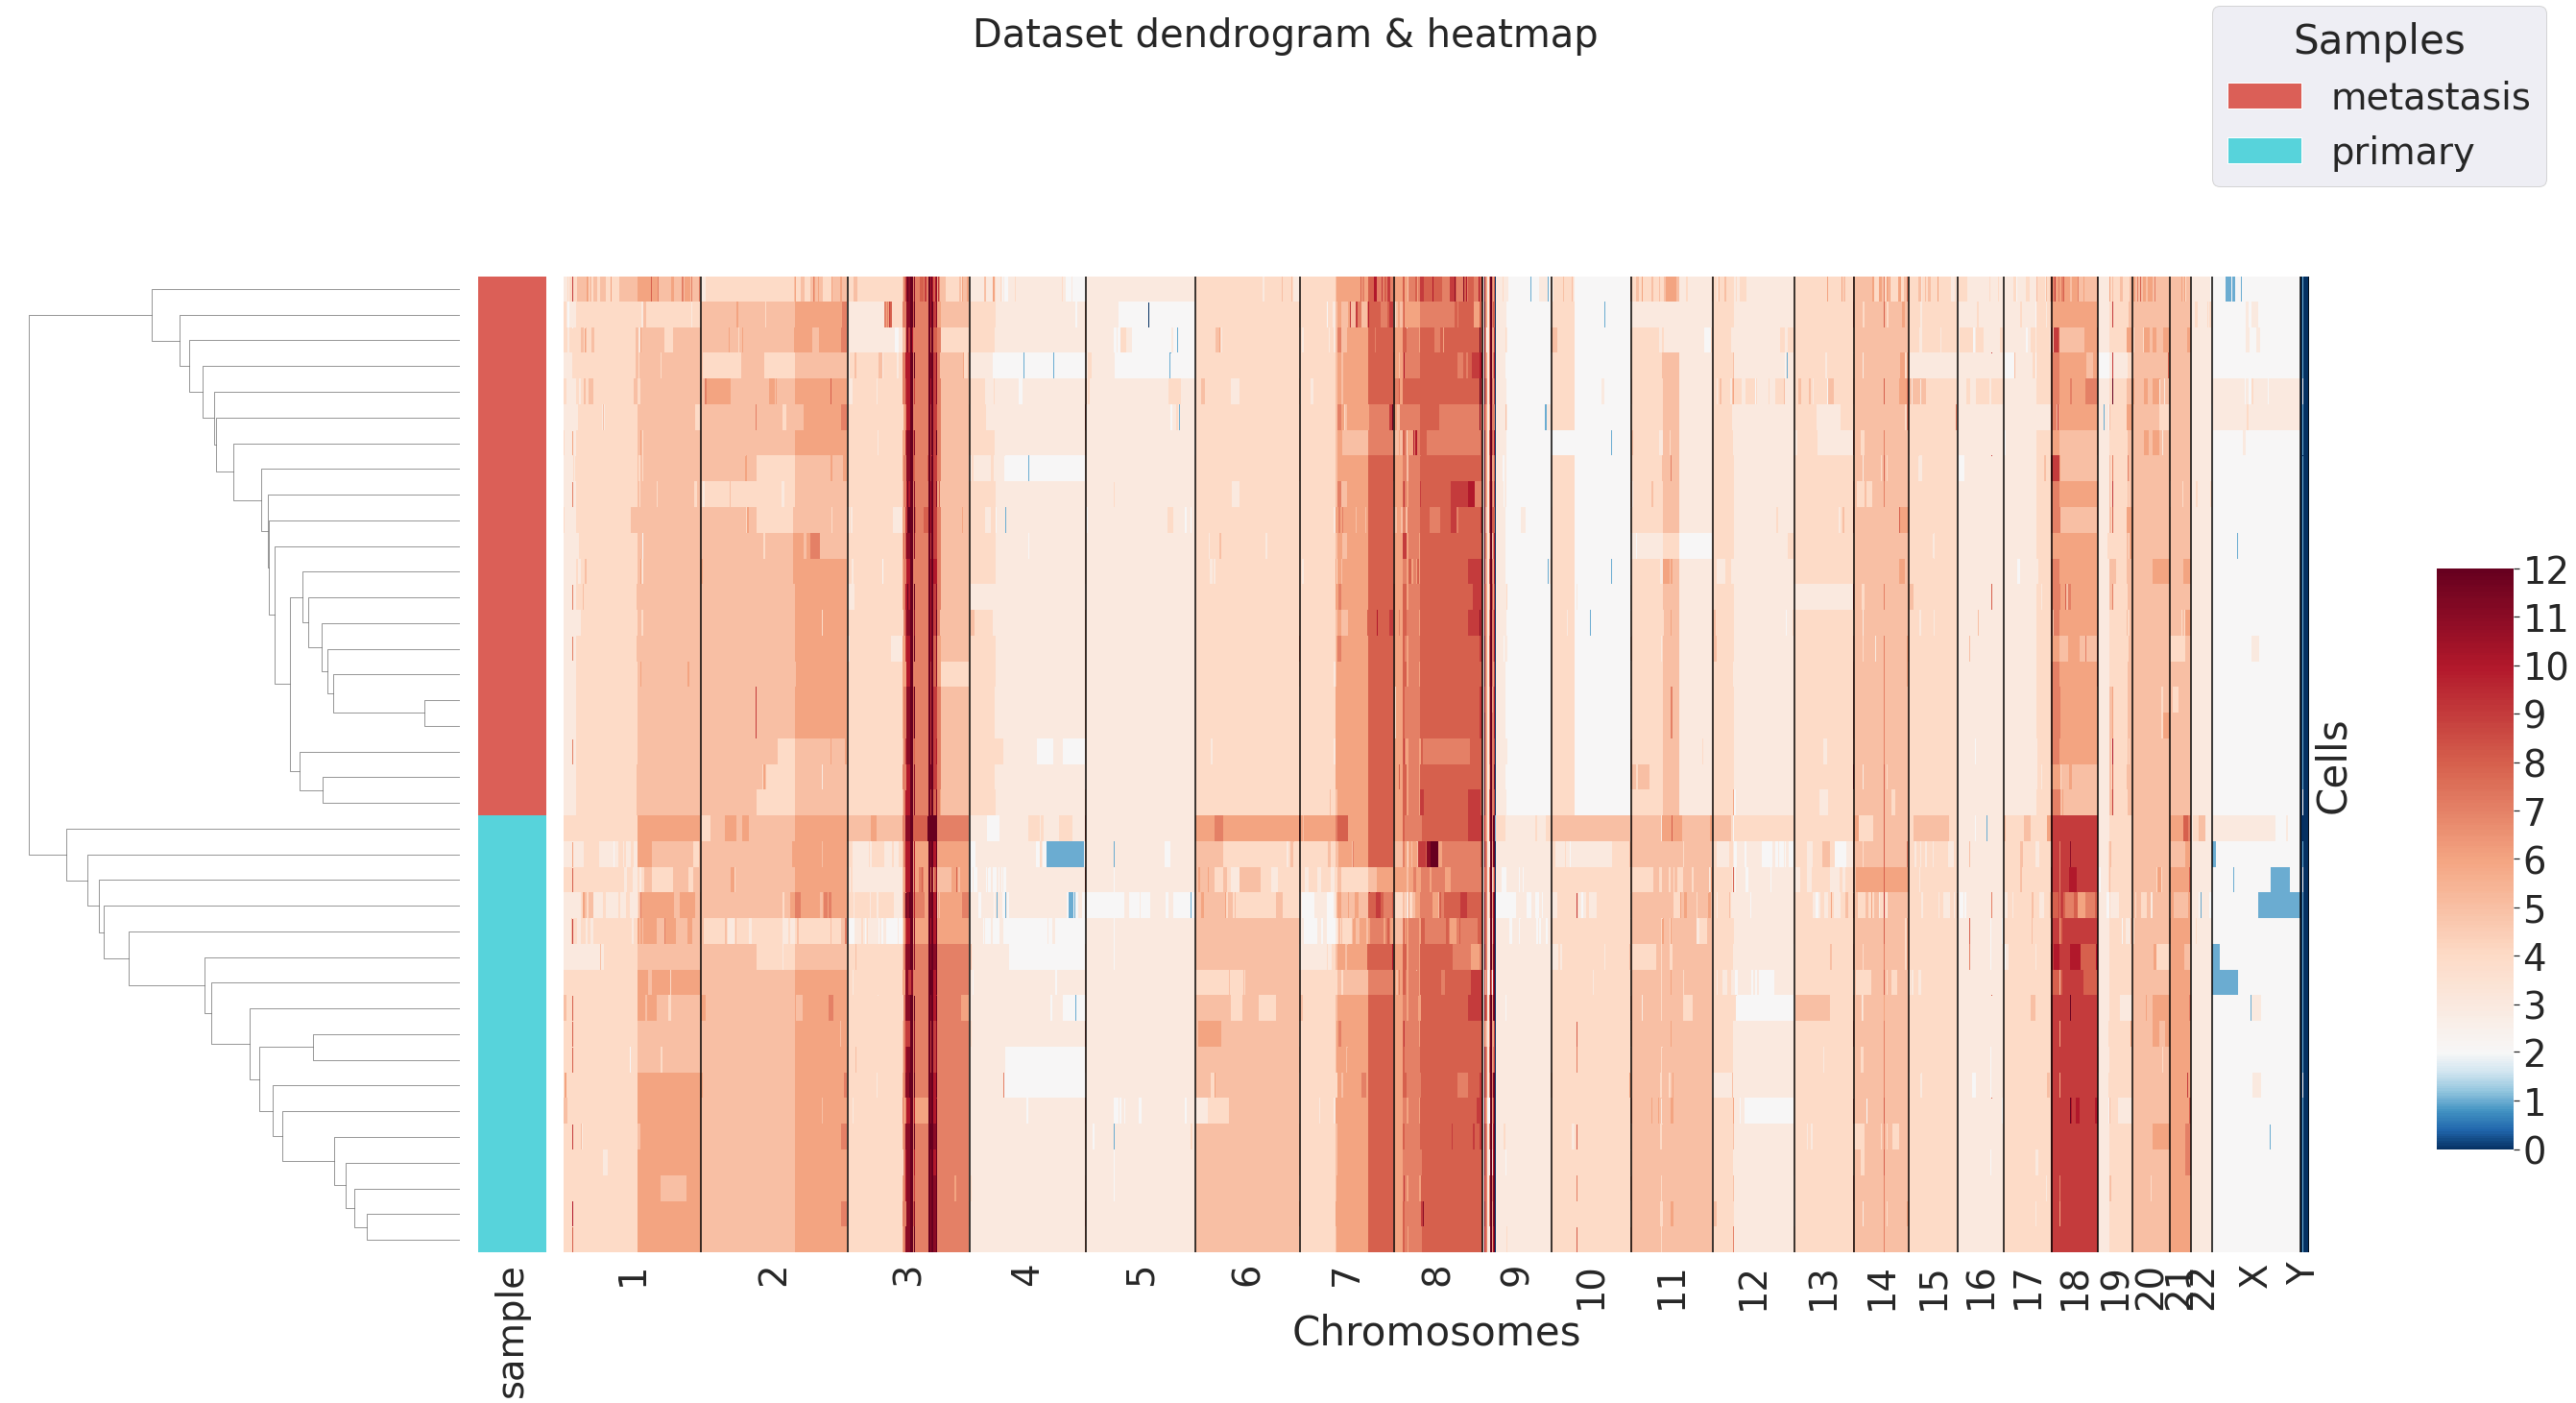

In [11]:
ss.plot_dendrogram()